In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

# Problem Statement  
A cloth manufacturing company is interested to know about the segment or attributes causes high sale  

In [2]:
# Importing Data

In [3]:
df = pd.read_csv("E:\Data Science\Assignments\Random Forest\Company_Data.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
# Checking Outliers 

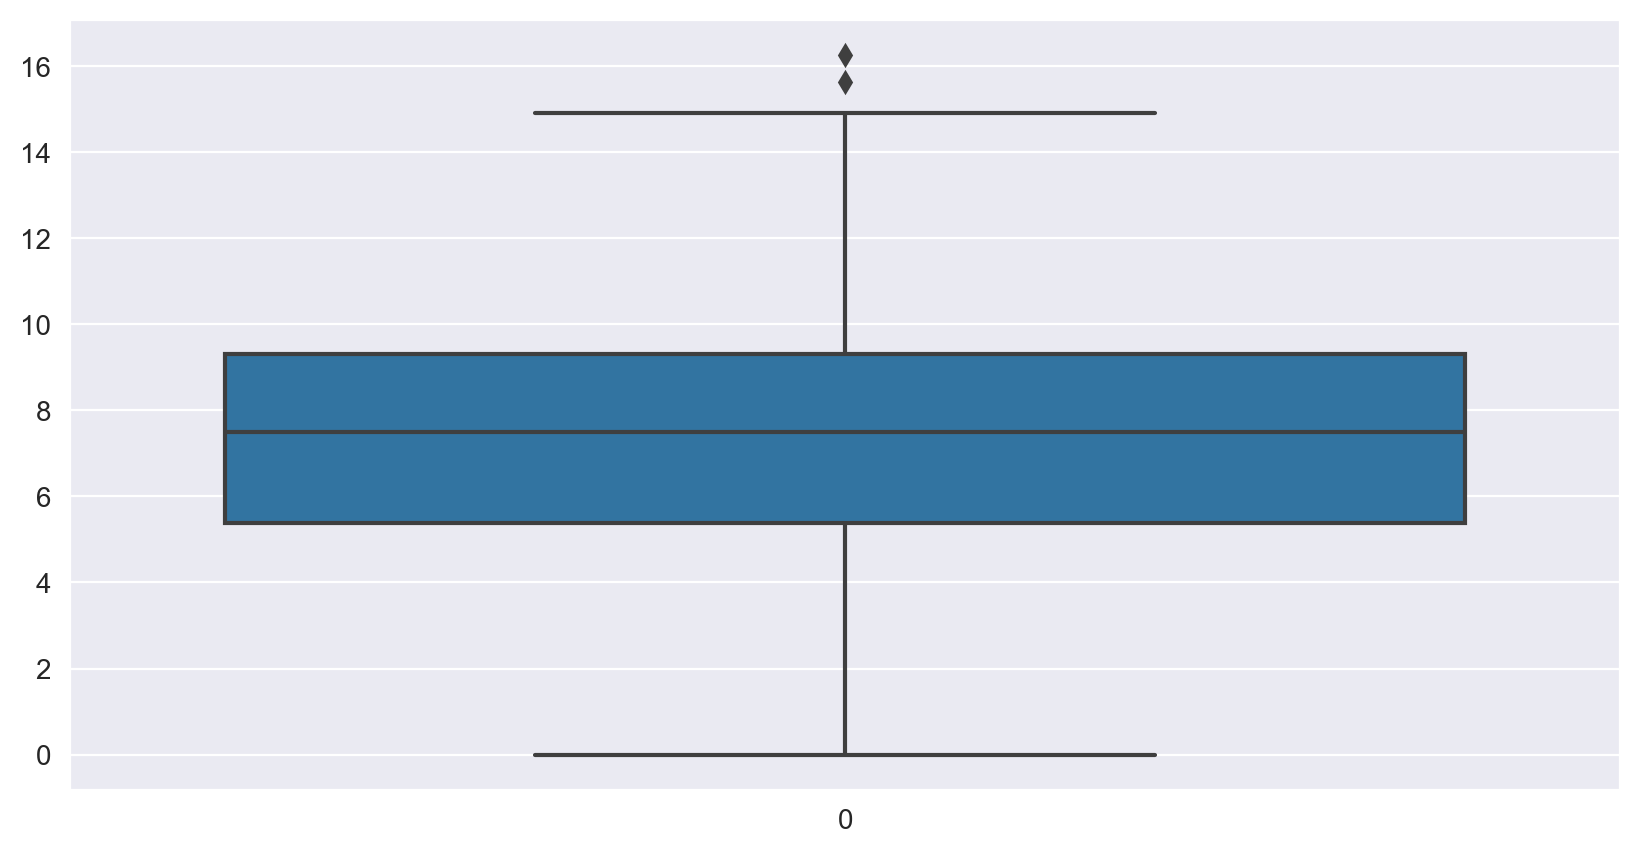

In [9]:
ax = sns.boxplot(df['Sales'])

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


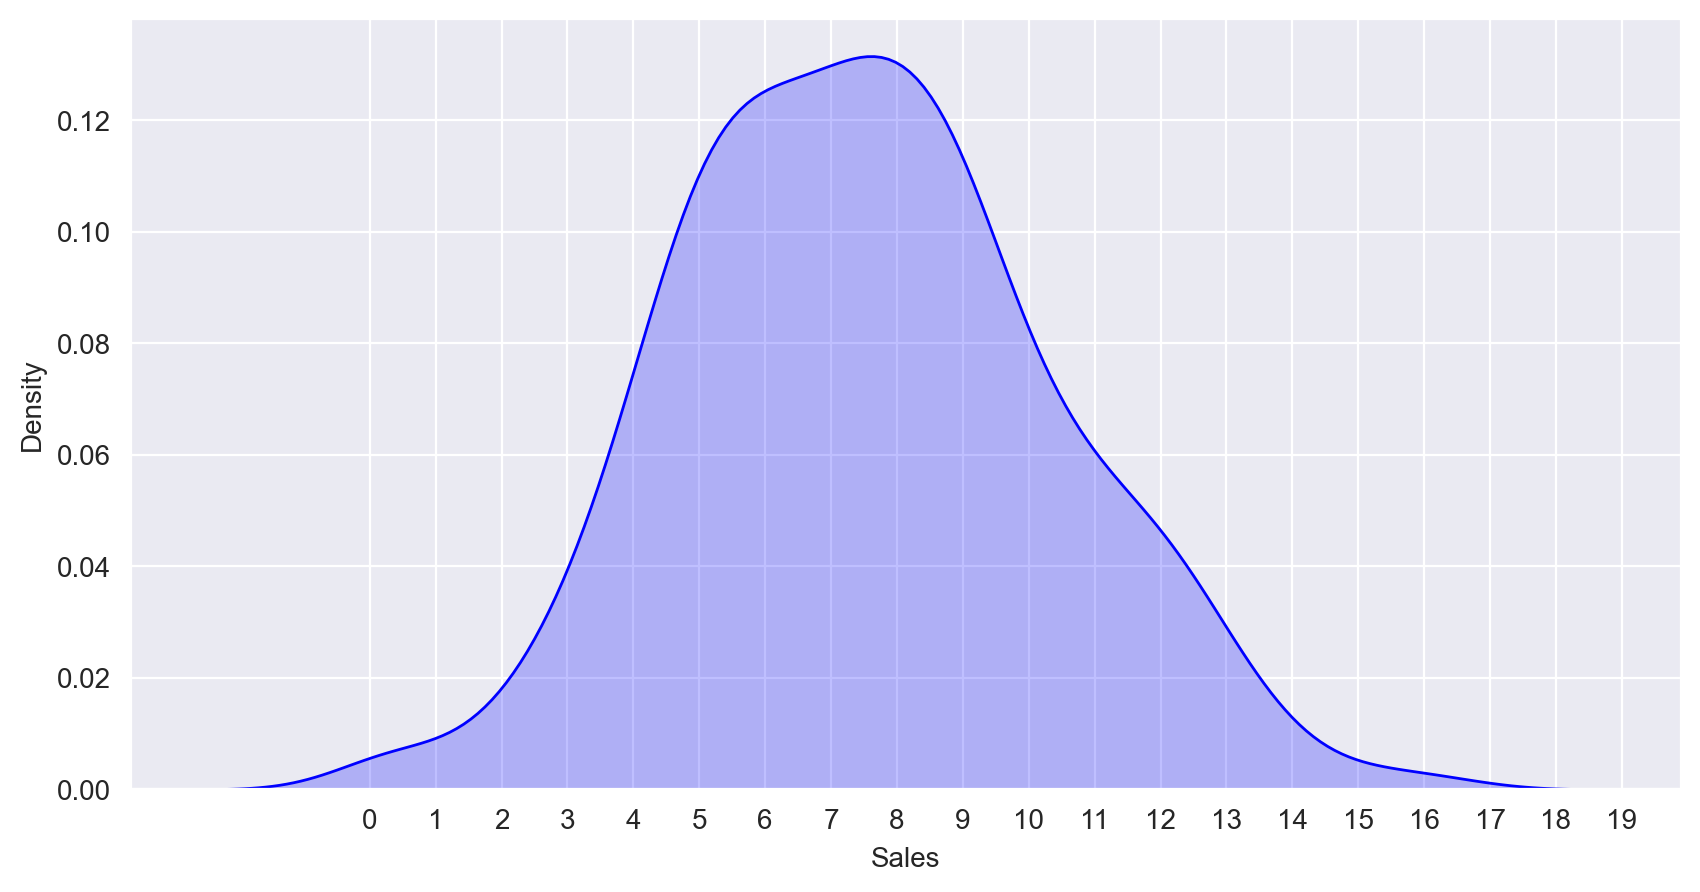

In [10]:
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [11]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

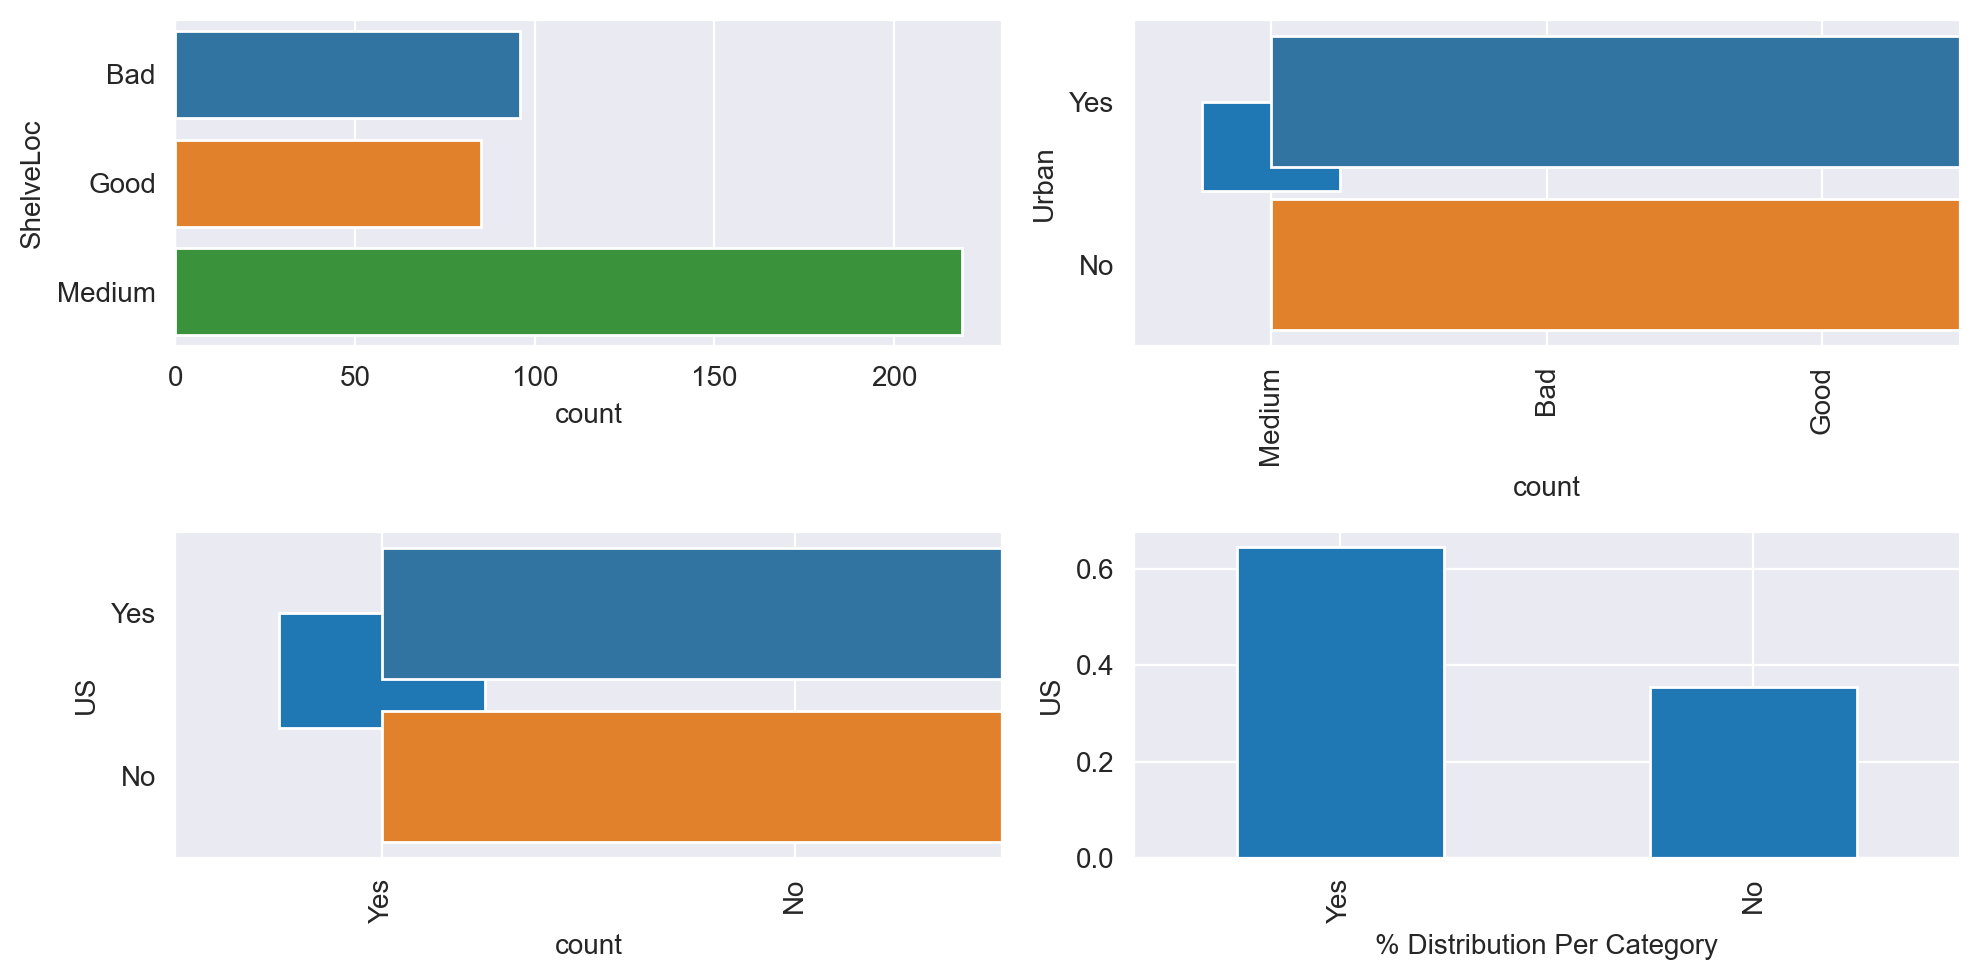

In [12]:
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% Distribution Per Category')
plt.tight_layout()
plt.show()  

In [13]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

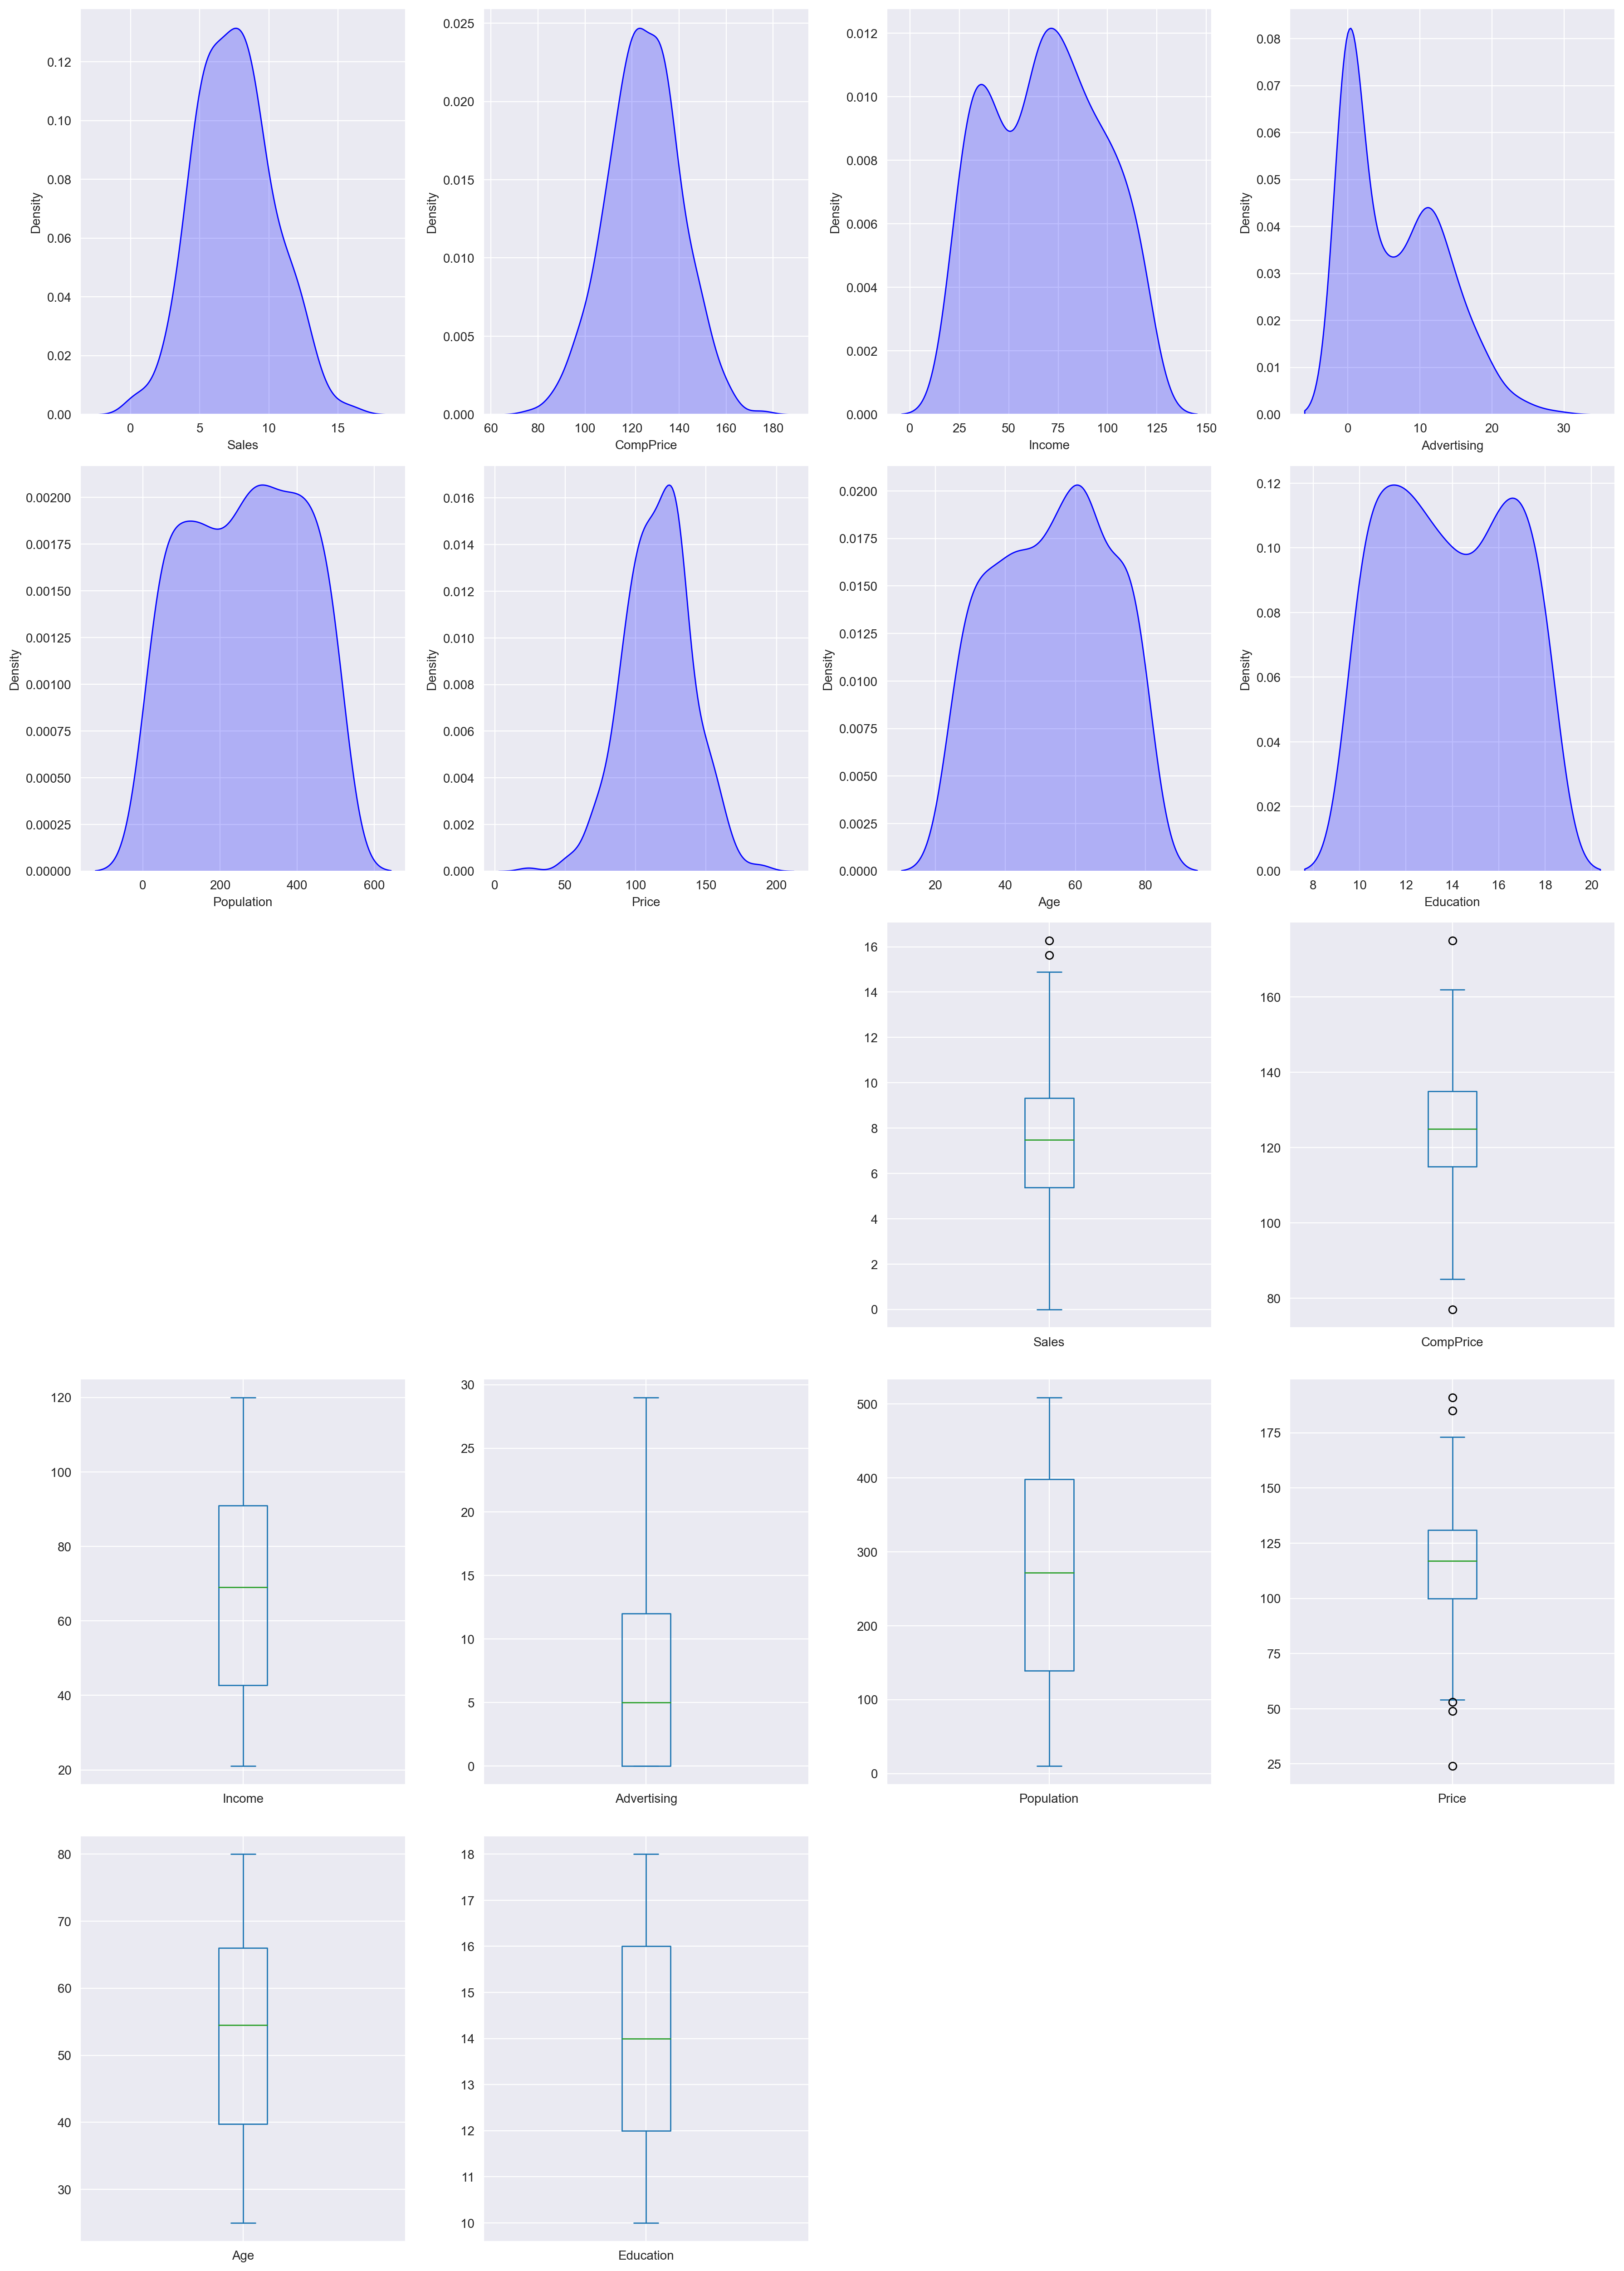

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
df = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

<Axes: >

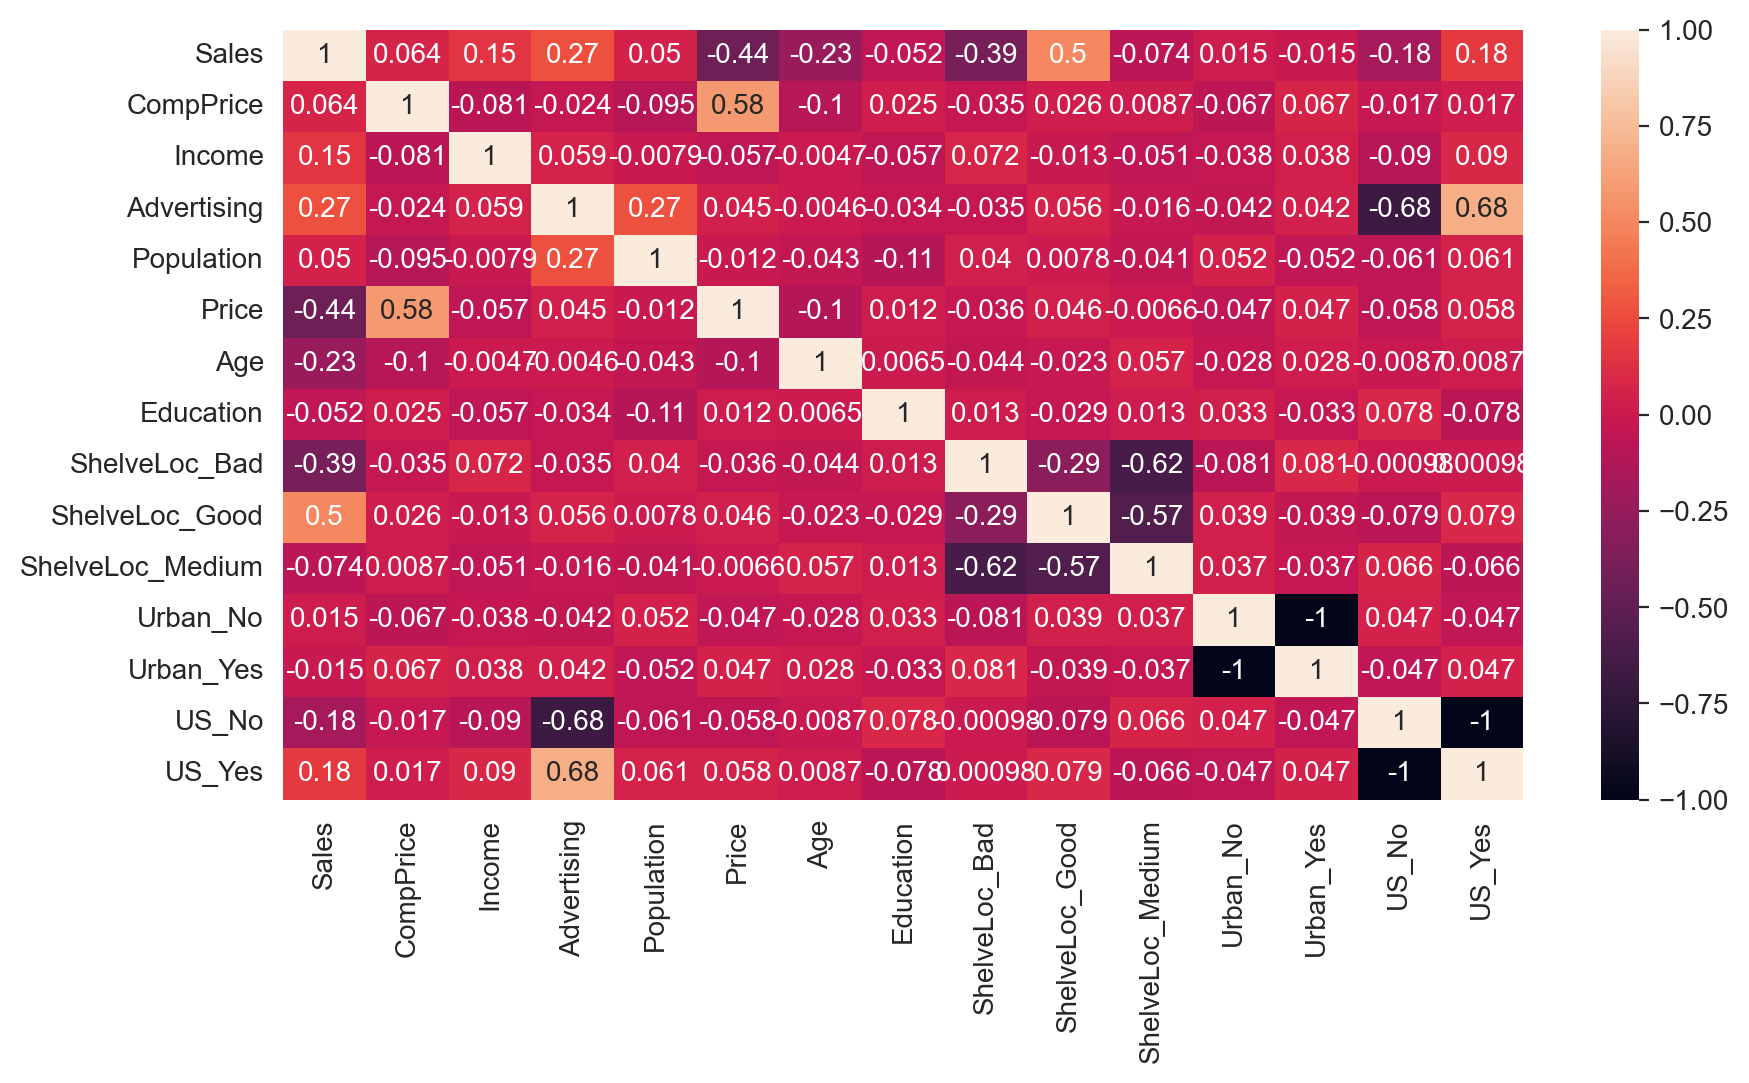

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
# Random Forest Model
model = RandomForestClassifier(n_estimators=110, max_features=5)

In [18]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [19]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=110)

In [23]:
Y_pred=model.predict(x_train)

In [24]:
accuracy_score(y_train,Y_pred)

1.0

In [25]:
model.score(x_train, y_train)

1.0

In [26]:
pred_test = model.predict(x_test)

In [27]:
accuracy_score(y_test,pred_test)

0.85

In [28]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Price               0.247970
Income              0.109960
CompPrice           0.108399
Age                 0.107473
Advertising         0.101518
ShelveLoc_Good      0.098042
Population          0.074650
ShelveLoc_Bad       0.048509
Education           0.041270
ShelveLoc_Medium    0.024257
US_Yes              0.010732
Urban_Yes           0.010234
US_No               0.008985
Urban_No            0.008004
dtype: float64

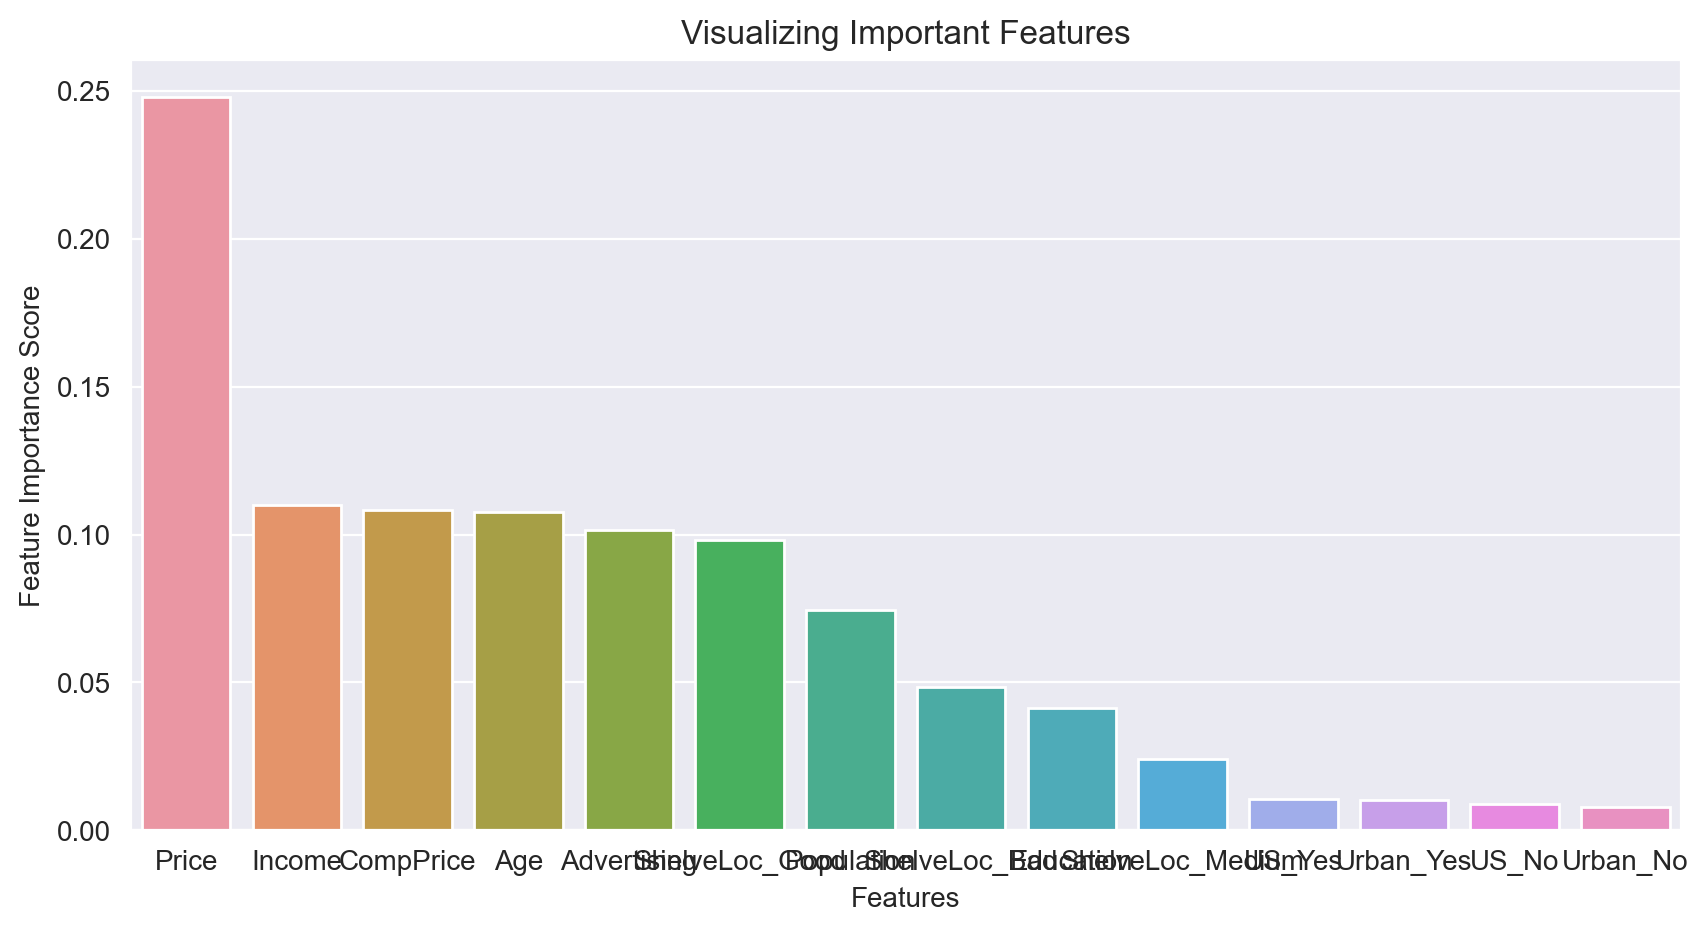

In [29]:
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

In [30]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=115, max_features=6)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [31]:
test = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
test

,max_features,train_acc,test_acc
0,1,1.0,0.8375
1,2,1.0,0.8125
2,3,1.0,0.8250
3,4,1.0,0.8375
4,5,1.0,0.8375
5,6,1.0,0.8125
6,7,1.0,0.8500
7,8,1.0,0.8500
8,9,1.0,0.8750


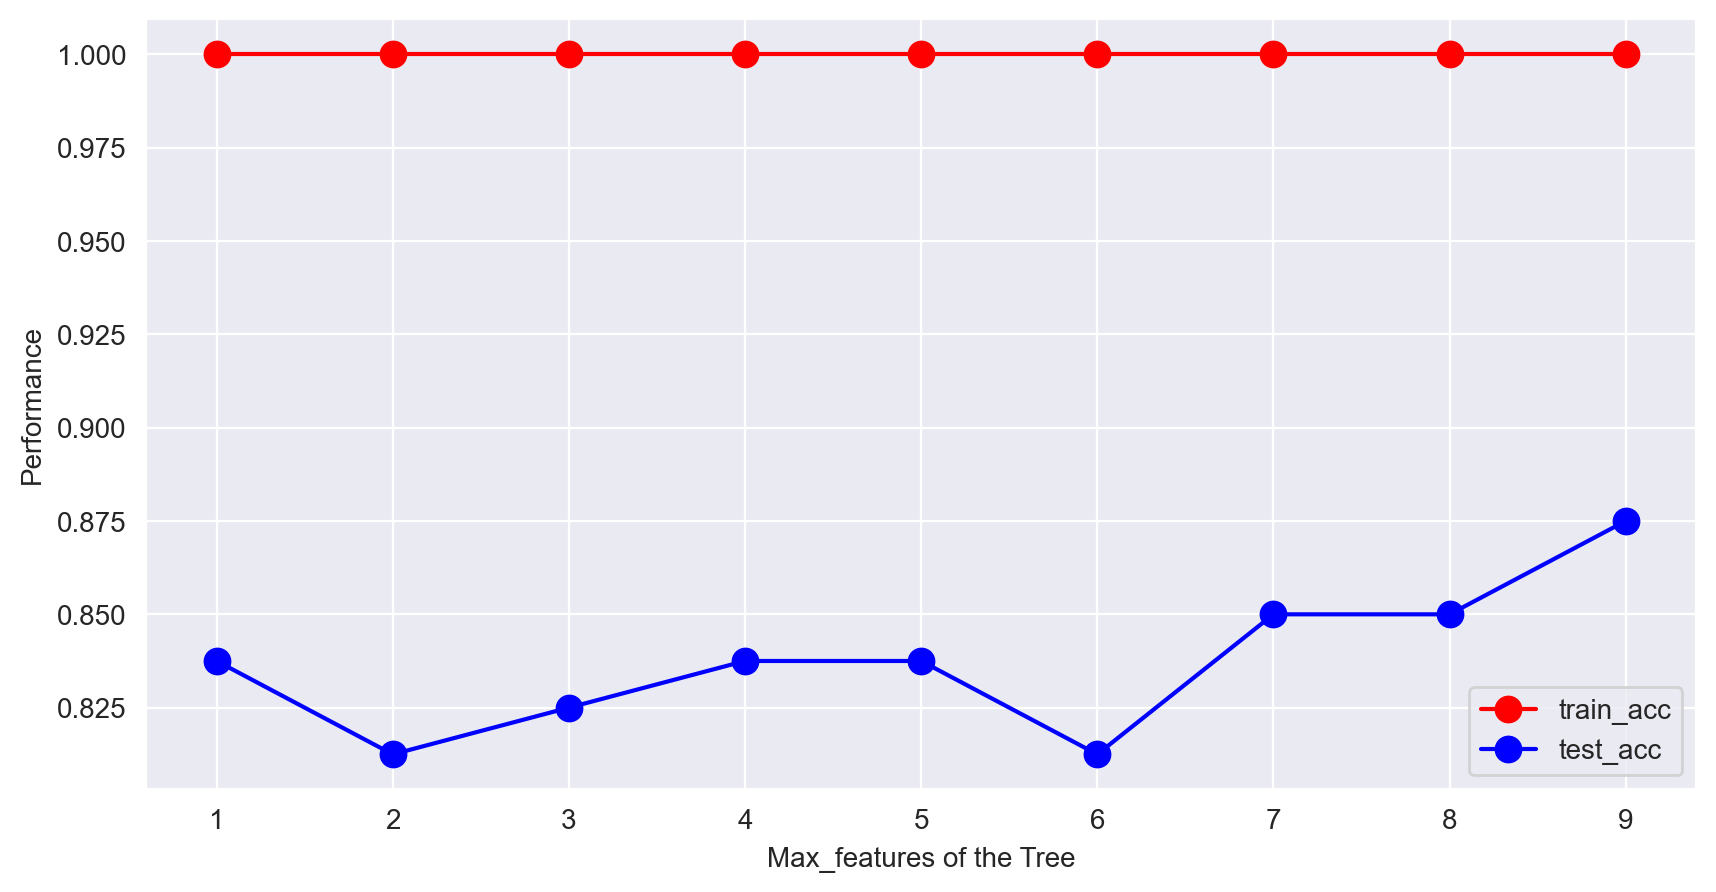

In [32]:
labels =['train_acc','test_acc']
plt.plot(test['max_features'],test['train_acc'], marker = 'o',markersize=9,color='red')
plt.plot(test['max_features'],test['test_acc'], marker = 'o',markersize=9,color='blue')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('Max_features of the Tree')
plt.ylabel('Performance')
plt.show()

# Conclusion 
The Random forest classifier with the maximum feature as two gives the highest accuracy of 86.25%. So it is a good model to know about the segment or attributes which causes high sale in manufacturing company, using Random forest.